In [1]:
def createOracleBalanced(q,c,n=2):
    circuit = QuantumCircuit(q,c)
    for i in range(n):
        circuit.cx(q[i], q[n])
    circuit.barrier(q)
    return circuit

def createOracleConstantOne(q,c,n=2):
    circuit = QuantumCircuit(q,c)
    circuit.x(q[n])
    circuit.barrier(q)
    return circuit

def createOracleConstantZero(q,c):
    circuit = QuantumCircuit(q,c)
    circuit.barrier(q)
    return circuit

def createInitialState(circuit):
    circuit.h(q[0])
    circuit.h(q[1])
    circuit.barrier(q)

def addAncilla(circuit):
    circuit.x(q[2])
    circuit.h(q[2])
    circuit.barrier(q)

def uncomputeAncilla(circuit):
    circuit.h(q[2])
    circuit.x(q[2])
    circuit.barrier(q)

def addMeasurement(circuit):
    circuit.h(q[0])
    circuit.h(q[1])
    circuit.barrier(q)
    circuit.measure(q[0], c[0])
    circuit.measure(q[1], c[1])
    circuit.barrier(q)

In [2]:
import numpy as np
from qiskit import *
%matplotlib inline

q = QuantumRegister(3,"q")
c = ClassicalRegister(3,"c")
circuit = QuantumCircuit(q,c)
createInitialState(circuit)
addAncilla(circuit)
circuit = circuit + (createOracleBalanced(q,c))
uncomputeAncilla(circuit)
addMeasurement(circuit)

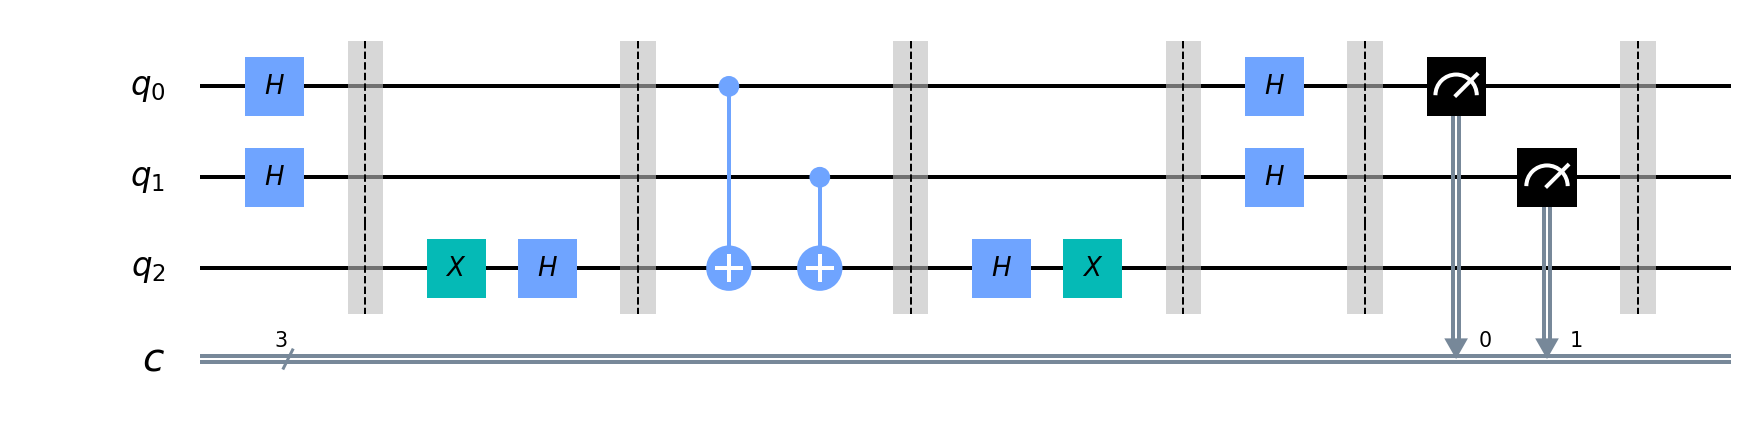

In [3]:
circuit.draw('mpl')

In [4]:
#Simulating
#Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [5]:
job = execute(circuit, backend)

In [6]:
result = job.result()

In [7]:
outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)

[0.+0.j 0.+0.j 0.+0.j 1.-0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


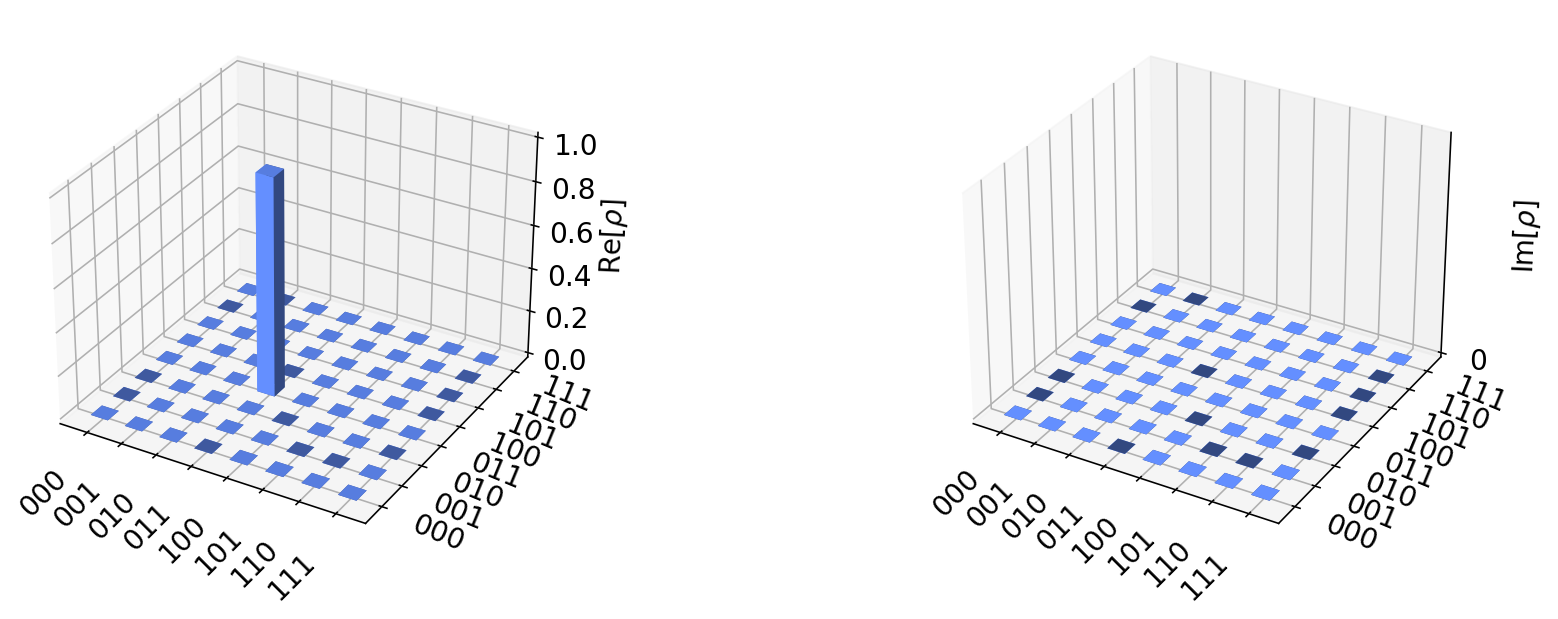

In [8]:
#visualize
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

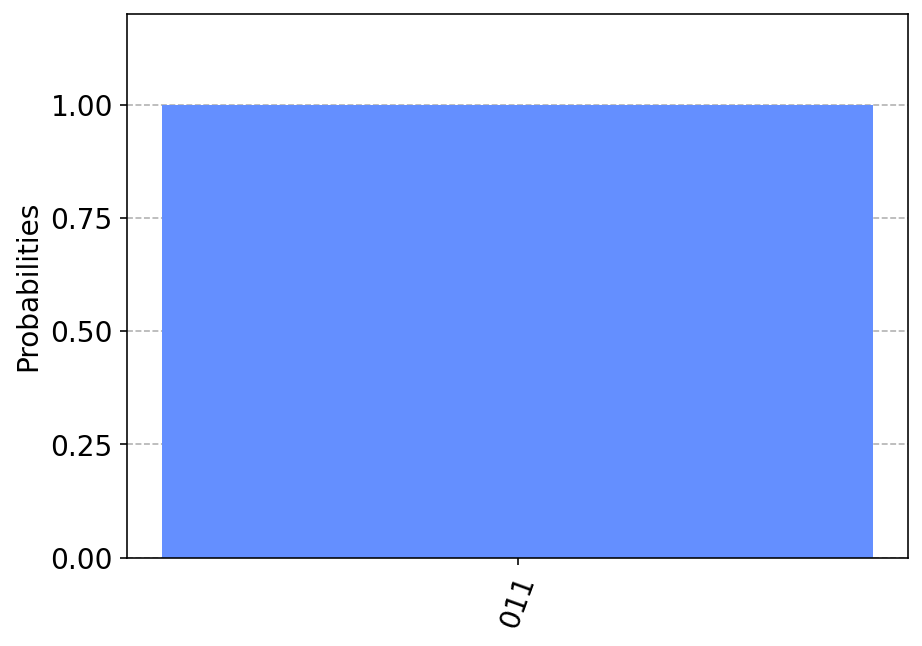

In [9]:
#Actual

from qiskit.visualization import plot_histogram
# Execute the circuit
ex = execute(circuit, backend, shots = 1024)
res = ex.result()

M = res.get_counts(circuit)

# Plot the results
plot_histogram(M, bar_labels=False)

In [10]:
#Classical Algorithm
x = [1, 1 ,0]
n = 3

#TODO: make a function probe oracle
q = QuantumRegister(n,"q")
c = ClassicalRegister(1,"c")
circuit = QuantumCircuit(q,c)
for i in range(n):
    if x[i] == 1:
        circuit.x(q[i])
circuit.barrier(q)
circuit = circuit + createOracleBalanced(q,c)
circuit.measure(q[2], c[0])
circuit.draw('mpl')
job = execute(circuit, backend)
result = job.result()
counts = result.get_counts(circuit)
for x, y in counts.items():
    if x==1 and y>0:
        print(1)
    else:
        print(0)



0


In [11]:
for number in range(2**n):
    print([(number >> bit) & 1 for bit in range(n - 1, -1, -1)])

[0, 0, 0]
[0, 0, 1]
[0, 1, 0]
[0, 1, 1]
[1, 0, 0]
[1, 0, 1]
[1, 1, 0]
[1, 1, 1]


In [12]:
n=11
def probeOracle(x,createOracleBalanced):
    q = QuantumRegister(n+1,"q")
    c = ClassicalRegister(1,"c")
    circuit = QuantumCircuit(q,c)
    for i in range(n):
        if x[i] == 1:
            circuit.x(q[i])
    circuit.barrier(q)
    circuit = circuit + createOracleBalanced(q,c)
    circuit.measure(q[n], c[0])
    circuit.draw('mpl')
    job = execute(circuit, backend)
    result = job.result()
    counts = result.get_counts(circuit)
    for x, y in counts.items():
        if x == '1' and y > .5:
            return 1
    return 0


zero = False
one = False
Oracle = lambda q,c : createOracleConstantOne(q,c,n)
#Oracle = lambda q,c : createOracleBalanced(q,c,n)
for number in range(2**n):
    x = [(number >> bit) & 1 for bit in range(n - 1, -1, -1)]
    y = probeOracle(x,Oracle)
    print('f(',x,') = ', y)
    if y == 1:
        if zero:
            print('Oracle is balanced.')
            break
        one = True
    elif y == 0:
        if one:
            print('Oracle is balanced.')
            break
        zero = True
    if number == 2**(n-1)+1:
        print('Oracle is constant.')
        break


f( [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ) =  1


f( [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] ) =  1
f( [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] ) =  1


f( [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1] ) =  1
f( [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ) =  1


f( [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1] ) =  1
f( [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0] ) =  1
f(

 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1] ) =  1
f( [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] ) =  1
f( [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1] ) =  1


f( [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0] ) =  1
f( [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1] ) =  1
f( [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0] ) =  1


f( [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1] ) =  1
f( [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0] ) =  1
f( [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1] ) =  1


f( [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] ) =  1
f( [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1] ) =  1


f( [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0] ) =  1
f( [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1] ) =  1


f( [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0] ) =  1
f( [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1] ) =  1
f( [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0] ) =  1


f( [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1] ) =  1
f( [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0] ) =  1
f( [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1] ) =  1


f( [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0] ) =  1
f( [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1] ) =  1
f( [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0] ) =  1


f( [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1] ) =  1


f( [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0] ) =  1


f( [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1] ) =  1
f( [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] ) =  1


f( [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1] ) =  1
f( [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0] ) =  1
f( [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1] ) =  1


f( [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0] ) =  1
f( [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1] ) =  1
f( [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0] ) =  1


f( [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1] ) =  1
f( [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0] ) =  1
f( [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1] ) =  1


f( [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0] ) =  1
f( [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1] ) =  1
f( [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0] ) =  1


f( [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1] ) =  1
f( [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0] ) =  1
f( [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1] ) =  1


f( [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0] ) =  1
f( [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1] ) =  1


f( [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0] ) =  1
f( [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1] ) =  1


f( [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0] ) =  1
f( [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1] ) =  1
f( [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0] ) =  1


f( [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1] ) =  1
f( [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0] ) =  1


f( [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1] ) =  1
f( [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0] ) =  1
f( [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1] ) =  1


f( [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0] ) =  1
f( [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1] ) =  1
f( [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0] ) =  1


f( [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1] ) =  1
f( [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] ) =  1
f( [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1] ) =  1


f( [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0] ) =  1
f( [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1] ) =  1
f(

 [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0] ) =  1


f( [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1] ) =  1
f( [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0] ) =  1
f( [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1] ) =  1


f( [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0] ) =  1
f( [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1] ) =  1


f( [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0] ) =  1
f( [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1] ) =  1


f( [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0] ) =  1
f( [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1] ) =  1
f(

 [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0] ) =  1
f( [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1] ) =  1
f( [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0] ) =  1


f( [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1] ) =  1
f( [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0] ) =  1
f( [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1] ) =  1


f( [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0] ) =  1
f( [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1] ) =  1
f( [0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0] ) =  1


f( [0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1] ) =  1
f( [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0] ) =  1
f( [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1] ) =  1


f( [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0] ) =  1
f( [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1] ) =  1
f( [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0] ) =  1


f( [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1] ) =  1
f( [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0] ) =  1


f( [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1] ) =  1
f( [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0] ) =  1


f( [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1] ) =  1
f( [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0] ) =  1


f( [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1] ) =  1
f( [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0] ) =  1


f( [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1] ) =  1
f( [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0] ) =  1


f( [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1] ) =  1
f( [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0] ) =  1
f(

 [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1] ) =  1
f( [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0] ) =  1
f( [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1] ) =  1


f( [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0] ) =  1
f( [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1] ) =  1
f(

 [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0] ) =  1
f( [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1] ) =  1
f( [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0] 

) =  1
f( [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1] ) =  1


f( [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0] ) =  1
f( [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1] ) =  1
f( [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0] ) =  1


f( [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1] ) =  1
f( [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0] ) =  1
f( [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1] ) =  1


f( [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0] ) =  1
f( [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1] ) =  1
f( [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0] ) =  1


f( [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1] ) =  1
f( [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0] ) =  1
f( [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1] ) =  1


f( [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0] ) =  1


f( [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] ) =  1
f( [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] ) =  1
f( [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1] ) =  1


f( [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0] ) =  1
f( [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1] ) =  1
f( [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0] ) =  1


f( [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1] ) =  1
f( [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0] ) =  1
f( [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1] ) =  1


f( [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0] ) =  1
f( [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1] ) =  1


f( [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] ) =  1
f( [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1] ) =  1
f( [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0] ) =  1


f( [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1] ) =  1
f( [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0] ) =  1


f( [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1] ) =  1
f( [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0] ) =  1


f( [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1] ) =  1
f( [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0] ) =  1
f( [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1] ) =  1


f( [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0] ) =  1
f( [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1] ) =  1
f( [0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0] ) =  1


f( [0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1] ) =  1
f( [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0] ) =  1
f(

 [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1] ) =  1
f( [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0] ) =  1
f( [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1] ) =  1


f( [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0] ) =  1
f( [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1] ) =  1
f( [0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0] ) =  1


f( [0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1] ) =  1
f( [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0] ) =  1
f( [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1] ) =  1


f( [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0] ) =  1


f( [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1] ) =  1
f( [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0] ) =  1


f( [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1] ) =  1
f( [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0] ) =  1


f( [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1] ) =  1


f( [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0] ) =  1
f( [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1] ) =  1


f( [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0] ) =  1
f( [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1] ) =  1


f( [0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0] ) =  1
f( [0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1] ) =  1


f( [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0] ) =  1
f( [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1] ) =  1


f( [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0] ) =  1
f( [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1] ) =  1


f( [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0] ) =  1
f( [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1] ) =  1


f( [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0] ) =  1
f( [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1] ) =  1


f( [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0] ) =  1
f( [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1] ) =  1


f( [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0] ) =  1
f( [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1] ) =  1


f( [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0] ) =  1
f( [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1] ) =  1


f( [0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0] ) =  1
f( [0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] ) =  1
f( [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0] ) =  1


f( [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1] ) =  1
f( [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0] ) =  1
f( [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1] ) =  1


f( [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0] ) =  1
f( [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1] ) =  1
f( [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0] ) =  1


f( [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1] ) =  1
f( [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0] ) =  1
f( [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1] ) =  1


f( [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0] ) =  1
f( [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1] ) =  1


f( [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0] ) =  1
f( [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1] ) =  1
f( [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0] ) =  1


f( [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1] ) =  1
f( [0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0] ) =  1
f( [0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1] ) =  1


f( [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0] ) =  1
f( [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1] ) =  1
f( [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0] ) =  1


f( [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1] ) =  1
f( [0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0] ) =  1
f( [0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1] ) =  1


f( [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0] ) =  1
f( [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1] ) =  1


f( [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0] ) =  1
f( [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1] ) =  1


f( [0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0] ) =  1
f( [0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1] ) =  1


f( [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0] ) =  1
f( [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1] ) =  1
